This file produces the transition matrix required for the Monte Carlo Markov Chain simulation, prepared in a Jupyter notebook instead of a simple Python file to enable ease of viewing charts.

In [37]:
import pandas as pd
import seaborn as sns

In [38]:
df = pd.read_csv("./output/df.csv", index_col = 0)
df = df.sort_values(["customer_no", "timestamp"])

In [39]:
df["prev_location"] = df["location"].shift(+1)
df.fillna("checkout", inplace = True)
df["prev_location"] = df["prev_location"].replace("checkout", "entrance")

In [41]:
transition_matrix = pd.crosstab(df["prev_location"], df["location"], normalize = "index")
print(transition_matrix)

location       checkout     dairy    drinks     fruit    spices
prev_location                                                  
dairy          0.102968  0.737587  0.058339  0.049819  0.051286
drinks         0.216372  0.010943  0.598534  0.087437  0.086714
entrance       0.000000  0.286639  0.153566  0.378050  0.181745
fruit          0.201769  0.095475  0.054963  0.597094  0.050699
spices         0.150464  0.193476  0.163096  0.090822  0.402143


Text(0.5, 23.52222222222222, 'going to')

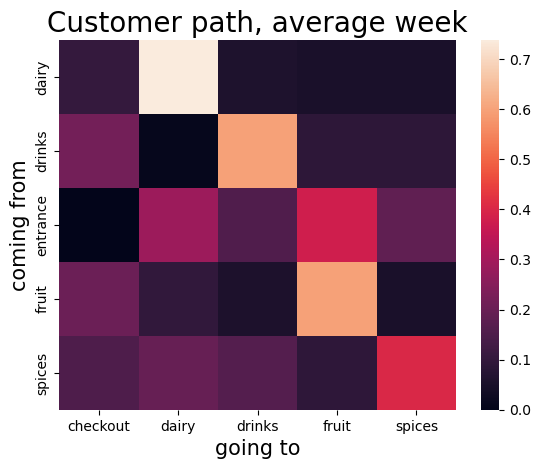

In [42]:
chart = sns.heatmap(transition_matrix)
chart.axes.set_title("Customer path, average week", fontsize = 20)
chart.set_ylabel("coming from", fontsize = 15)
chart.set_xlabel("going to", fontsize = 15)

In [43]:
transition_matrix.to_csv("./output/transition_matrix.csv")